#Dataset Details


## Dataset Characteristics
Multivariate

## Subject Area
Biology

## Associated Tasks
Classification

## Feature Type
Categorical, Integer

## Instances
581012

## Features
54

Name / Data Type / Measurement / Description

Elevation / quantitative /meters / Elevation in meters
Aspect / quantitative / azimuth / Aspect in degrees azimuth
Slope / quantitative / degrees / Slope in degrees
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

Class Labels

Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Cottonwood/Willow, Aspen, Douglas-fir, Krummholz

Code	Wilderness Area	General Description
1	Rawah Wilderness Area	Mid‑elevation area with a mix of forest types. 
UCI Machine Learning Repository

2	Neota Wilderness Area	Higher‑elevation, dominated by spruce/fir forests. 
UCI Machine Learning Repository

3	Comanche Peak Wilderness Area	Similar to Rawah, with lodgepole pine and aspen. 
UCI Machine Learning Repository

4	Cache la Poudre Wilderness Area	Lower‑elevation area supporting Ponderosa pine, Douglas‑fir, cottonwood/willow.

In [1]:
import pandas as pd
import warnings
import sys
import pathlib

project_root = pathlib.Path().resolve().parent
sys.path.append(str(project_root))

from forest_cover_pred.plots import plot

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


2025-12-12 13:39:24.662 | INFO     | forest_cover_pred.config:<module>:11 - PROJ_ROOT path is: /home/anuja/ml/forest_cover_prediction


In [2]:
df = pd.read_csv("../data/raw/covtype.csv")
print("Dataset shape:", df.shape)
df.head(5)

Dataset shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
# try:
#     from ydata_profiling import ProfileReport
#     print("ydata_profiling is already installed.")
# except ImportError:
#     print("ydata_profiling not found, installing...")
#     !pip install -q ydata_profiling
#     from ydata_profiling import ProfileReport
#     print("ydata_profiling installed and imported successfully.")


# profile = ProfileReport(df, title="Covtype Data Profile Report")


# report_path = 'covtype_profile_report.html'
# profile.to_file(report_path)
# print(f"Data profiling report saved to {report_path}")

<Figure size 1500x1500 with 0 Axes>

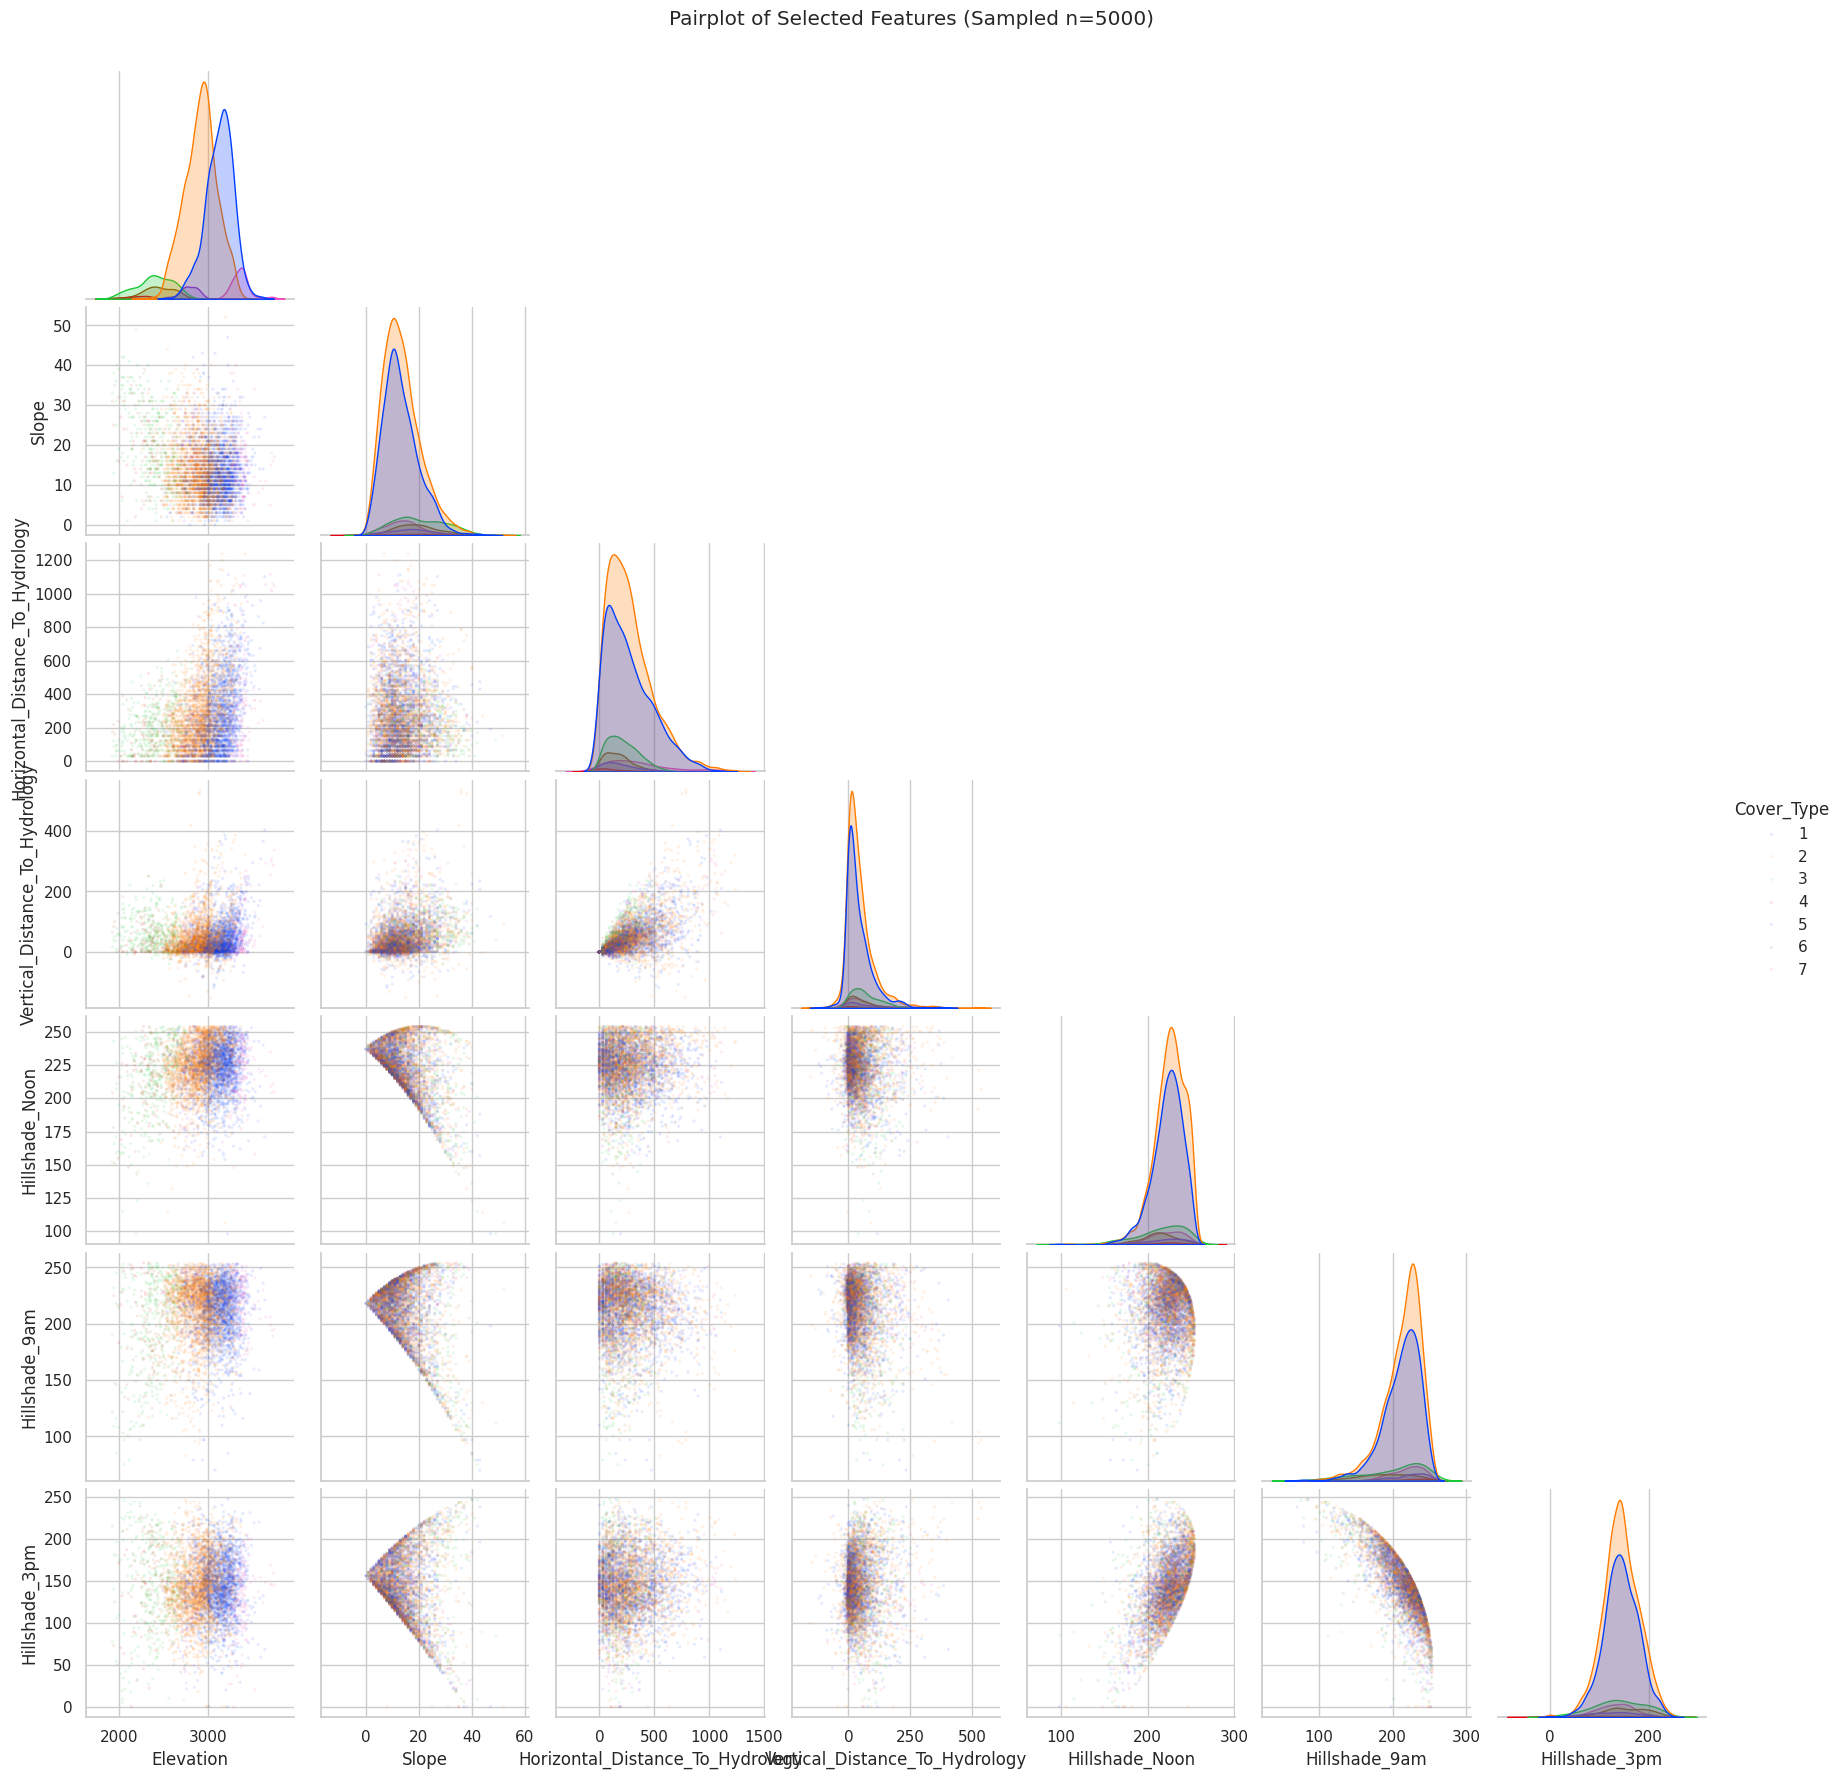

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- KEY FIX 1: Sample the data ---
# Plotting 500k+ points causes overplotting. 5000 is enough to see distribution.
df_sample = df.sample(n=5000, random_state=42) 

selected_features = [
    'Elevation', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Hillshade_Noon','Hillshade_9am','Hillshade_3pm'
]

plt.figure(figsize=(15, 15)) # Optional: Make the figure larger
sns.pairplot(
    df_sample[selected_features + ['Cover_Type']],
    hue='Cover_Type',
    diag_kind='kde',
    corner=True,       # --- KEY FIX 2: Removes redundant upper triangle ---
    palette='bright',  # Optional: Distinct colors help separate the 7 classes
    plot_kws={
        'alpha': 0.1,  # --- KEY FIX 3: Very low opacity to show density ---
        's': 5,        # --- KEY FIX 4: Smaller dots ---
        'edgecolor': 'none' # Removes outline to make rendering faster and cleaner
    }
)

plt.suptitle("Pairplot of Selected Features (Sampled n=5000)", y=1.02)
plt.show()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()
df.duplicated().sum()

In [ ]:
wilderness_cols = df.iloc[:, 10:14]
soil_cols = df.iloc[:, 14:54]


one_wilderness_per_row = (wilderness_cols.sum(axis=1) == 1).all()
one_soil_per_row = (soil_cols.sum(axis=1) == 1).all()

print("Each row has exactly one wilderness area set?:", one_wilderness_per_row)
print("Each row has exactly one soil type set?:", one_soil_per_row)

In [ ]:
num_cols = [
    "Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways",
    "Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

wilderness_cols = [f"Wilderness_Area{i}" for i in range(1,5)]
soil_cols = [f"Soil_Type{i}" for i in range(1,41)]
target_col = ["Cover_Type"]

In [ ]:
plot(df, xcol="Cover_Type", plot_type="bar", title="Distribution of Forest Cover Types",save=True, save_path="../reports/figures/cover_type_distribution.html")


In [ ]:
for col in num_cols:
    fig = plot(df, xcol=col, plot_type="histogram", bins=50,
               title=f"Histogram of {col}",save=True, save_path=f"../reports/figures/histogram_{col}.html",category='Cover_Type')


In [ ]:
fig = plot(df, xcol="Cover_Type", ycol="Elevation", plot_type="box",
           title="Elevation by Cover Type",save=True, save_path="../reports/figures/elevation_by_cover_type_box.html")

In [ ]:
# fig = plot(df, xcol="Aspect", ycol="Slope",
#            plot_type="density", title="Aspect vs Slope (Density by Cover Type)")


In [ ]:
#Coverting Wilderness Area and Soil Type columns back to categorical for plotting
df["Wilderness_Area_Label"] = df[wilderness_cols].idxmax(axis=1)
fig = plot(df, xcol="Wilderness_Area_Label", plot_type="bar",
           title="Count of Wilderness Areas",save=True, save_path="../reports/figures/wilderness_area_counts.html")


# Convert Wilderness Area to numeric
df["Wilderness_Area_Code"] = df[wilderness_cols].idxmax(axis=1).str.extract(r'(\d+)$').astype(int)

# Convert Soil Type to numeric
df["Soil_Type_Code"] = df[soil_cols].idxmax(axis=1).str.extract(r'(\d+)$').astype(int)
df["Soil_Type_Label"] = df[soil_cols].idxmax(axis=1)
fig = plot(df, xcol="Soil_Type_Code", plot_type="bar",
           title="Count of Soil Types",save=True, save_path="../reports/figures/soil_type_counts.html")



In [ ]:
fig = plot(df, xcol="Cover_Type", ycol="Horizontal_Distance_To_Roadways",
           plot_type="violin",
           title="Road Distance by Forest Cover Type",save=True, save_path="../reports/figures/road_distance_by_cover_type_violin.html")


In [ ]:
counts_table = pd.crosstab(df["Cover_Type"], df["Soil_Type_Label"])

import IPython.display as disp
disp.display(counts_table.style.background_gradient("viridis"))

# Get the HTML for the styled table
html = counts_table.style.background_gradient("viridis").to_html()

# Write the HTML to a file
with open("cover_soil_counts.html", "w") as f:
    f.write(html)


In [ ]:
fig = plot(df.drop(columns=wilderness_cols + soil_cols), plot_type="corr", title="Correlation Matrix (Numerical Vars)",save=True, save_path="../reports/figures/correlation_matrix.html")

In [ ]:
df.to_csv("../data/processed/covtype_explored.csv", index=False)